**Import required packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


import pandas as pd
# pd.core.common.is_list_like = pd.api.types.is_list_like  # can remove this when v0.7 of pdr is available
import pandas_datareader.data as web
import datetime as dt

from portbalance import *

%load_ext autoreload
%autoreload 2

**Specific current holdings and target allocation**
+ Specify the current holdings of each equity in the `num_shares` list
+ The example portfolios here are provided as-is for education purposes. They do not constitute a recommended or endorsed investment stragegy

In [2]:
# ## a portfolio based on the pre-2018 Betterment strategy (international heavy)
# symbs = ["SCHB", "VTI", "VTV", "VOE", "VBR", "VEA", "SCHF", "VWO", "IEMG", "VXUS"]
# target_alloc = [0.087, 0.087, 0.178, 0.05, 0.05, 0.205, 0.205, .0655, .0655, 0]
# num_shares = np.array([45, 31, 42, 5, 20, 31, 32, 41, 21, 32])  ## Your current holdings of each equity (number of shares)


# ## an all-stock "lazy" Bogleheads portfolio
# symbs = ['VTI','SCHB','VXUS']
# target_alloc = [.35, .35, .3]
# num_shares = np.array([13,26,27])## Your current holdings of each equity (number of shares)


## a portfolio based on the Betterment 2018 all-stock allocation
symbs = ['SCHB','VTI','VXUS','VOE','VBR','VEA','VWO','VXUS']
target_alloc = [0.1765, 0.1765, 0.094, 0.077, 0.065, 0.1295, 0.076, 0.205]
num_shares = np.array([150,60,90,43,23,170,100,220]) ## Your current holdings of each equity (number of shares)

# api_key = str(np.loadtxt('keys.txt', dtype='str'))
df = get_prices(symbs,  dt.datetime(2015, 1, 1), dt.datetime.now())
curr_prices = np.array([df.loc[symb]['close'][-1] for symb in symbs])

curr_prices = curr_prices.astype(float)
curr_value = num_shares.dot(curr_prices)
curr_alloc = (num_shares*curr_prices)/curr_value

In [3]:
sim_shares = np.copy(num_shares)
sim_alloc = np.copy(curr_alloc)
num_buys = 10000
cost = 0

buy_series = list()
cost_series = [0]
drift_series = list()

for ii in range(num_buys):
    drift = sim_alloc - target_alloc
    net_drift = np.sum(np.abs(drift))
    rel_drift = (drift*curr_prices)/curr_prices
    ordering = np.argsort(rel_drift)
    buy_index = ordering[0]
    
    
    cost += curr_prices[buy_index]
    
    sim_shares[buy_index] += 1
    sim_alloc = (sim_shares*curr_prices)/(sim_shares.dot(curr_prices))
    
    buy_series.append(buy_index)
    cost_series.append(cost)
    drift_series.append(net_drift)
cost_series = np.array(cost_series)
buy_series = np.array(buy_series)

Text(0,0.5,'Total portfolio drift')

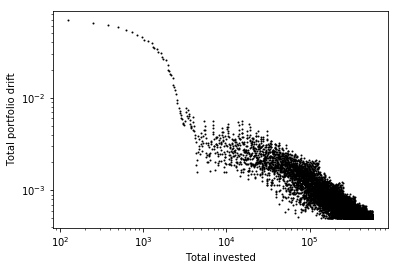

In [4]:
plt.figure()
plt.loglog(cost_series[1:], drift_series,'.k', markersize=2)
plt.xlabel('Total invested')
plt.ylabel('Total portfolio drift')

In [5]:
sum_to_invest = 15000

stop_ind = len(cost_series[cost_series<sum_to_invest])-1
buy_series_truncated = buy_series[:stop_ind]
inds, cts = np.unique(buy_series_truncated, return_counts=True)

print("Investing strategy:")
for ind, ct in zip(inds,cts):
    print(str(symbs[ind]), ': ', str(ct))

print('\nResidual balance: ', str(sum_to_invest - cost_series[stop_ind]))

print('\nResidual drift: ', str(100*drift_series[stop_ind]),'%')

Investing strategy:
SCHB :  37
VTI :  28
VXUS :  35
VOE :  9
VBR :  13
VEA :  50
VWO :  25
VXUS :  54

Residual balance:  36.64000000001579

Residual drift:  0.2226284330297451 %


## Analyze historical performance of a portfolio

In [20]:
## Load portfolio
from io import StringIO

## Load from an inline example
inline_txt = StringIO("""
SCHB, 150, 01/20/2015, 45.41
VTI, 60, 01/26/2015, 98.28
VXUS, 90, 03/20/2015, 45.78
SCHB, 150, 03/20/2015,
VWO, 10, 04/20/2015,
VTI, 8, 04/20/2015, 46.83
""")
port = Portfolio(inline_txt)

## Load from an external CSV file in the working directory
# port = Portfolio('sample_portfolio.txt')

In [21]:
net_return = np.sum(port.current_value())/np.sum(port.portfolio["Price"]) - 1
print("Net return on principal:", net_return)

Net return on principal: 0.40414776425699706
